This is a simple notebook that replicates https://mrf-web.readthedocs.io/en/latest/usage.html#usage

In [1]:
# needs correcting as the documentation a from MRF import *
from MacroRandomForest import *
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n = 1000

# Create normally distributed data for each column
data = {
    'sim_y': np.random.normal(0, 1, n),
    'sim_x1': np.random.normal(0, 1, n),
    'sim_x2': np.random.normal(0, 1, n),
    'sim_x3': np.random.normal(0, 1, n),
    'sim_x4': np.random.normal(0, 1, n),
    'sim_x5': np.random.normal(0, 1, n),
    'sim_x6': np.random.normal(0, 1, n),
    'sim_x7': np.random.normal(0, 1, n),
    'sim_x8': np.random.normal(0, 1, n),
    'sim_x9': np.random.normal(0, 1, n),
    'sim_x10': np.random.normal(0, 1, n),
    'sim_x11': np.random.normal(0, 1, n),
    'sim_x12': np.random.normal(0, 1, n),
    'sim_x13': np.random.normal(0, 1, n),
    'sim_x14': np.random.normal(0, 1, n),
    'sim_x15': np.random.normal(0, 1, n),
    'trend': np.random.normal(0, 1, n)
}

# Create the DataFrame
simulated_data = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(simulated_data.head())

# Display basic information about the DataFrame
print(simulated_data.info())


      sim_y    sim_x1    sim_x2    sim_x3    sim_x4    sim_x5    sim_x6  \
0  0.496714  1.399355 -0.675178 -1.907808 -0.863494 -0.423760 -1.114081   
1 -0.138264  0.924634 -0.144519 -0.860385 -0.031203 -0.453414 -0.630931   
2  0.647689  0.059630 -0.792420 -0.413606  0.018017 -1.795643 -0.942060   
3  1.523030 -0.646937 -0.307962  1.887688  0.472630 -0.330090 -0.547996   
4 -0.234153  0.698223 -1.893615  0.556553 -1.366858  0.732829 -0.214150   

     sim_x7    sim_x8    sim_x9   sim_x10   sim_x11   sim_x12   sim_x13  \
0  0.785185 -0.033025  0.765402 -0.678495 -1.178180  1.174814  0.011736   
1 -1.777681 -0.503650  1.073413 -0.305499  0.432850 -1.878981  0.527439   
2  0.714746 -0.172375  0.498690 -0.597381  1.110753 -0.327795 -1.611003   
3 -0.233724  0.714732 -1.942498  0.110418  0.755185 -0.041660 -0.919898   
4  0.707458  1.277857 -0.155422  1.197179  1.084478  0.015909 -0.148179   

    sim_x14   sim_x15     trend  
0 -0.224241 -0.143423  0.879307  
1 -0.210835 -0.032656  0.03930

In [4]:
### Dependent Variable
my_var = "sim_y"
y_pos = simulated_data.columns.get_loc(my_var)

### Exogenous Variables
S_vars = [f"sim_x{i}" for i in range(1, 16)] + ['trend']
S_pos = [simulated_data.columns.get_loc(s) for s in S_vars]

### Variables Included in Linear Equation
x_vars = ["sim_x1", 'sim_x2', 'sim_x3']
x_pos = [simulated_data.columns.get_loc(x) for x in x_vars]

In [5]:
oos_pos = np.arange(len(simulated_data) - 50 , len(simulated_data)) # lower should be oos start, upper the length of your dataset

In [26]:
oos_pos


array([950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])

In [7]:
y_pos = np.atleast_1d(y_pos)
x_pos = np.atleast_1d(x_pos)
S_pos = np.atleast_1d(S_pos)
oos_pos = np.atleast_1d(oos_pos)

MRF = MacroRandomForest(data = simulated_data,
                        y_pos = y_pos,
                        x_pos = x_pos,
                        S_pos = S_pos,
                        B = 2,
                        parallelise = False,
                        n_cores = 1,
                        resampling_opt = 2,
                        oos_pos = oos_pos,
                        trend_push = 4,
                        quantile_rate = 0.3,
                        print_b = True,
                        fast_rw = True)

In [8]:
MRF_output = MRF._ensemble_loop()

Tree 1 out of 2
Tree 2 out of 2


c:\dev\checkout\macroeconomic-random-forest\.venv\Lib\site-packages\MacroRandomForest\MRF.py:321: RuntimeWarning: invalid value encountered in divide
  self.avg_beta_nonOVF = self.avg_beta_nonOVF / \
c:\dev\checkout\macroeconomic-random-forest\.venv\Lib\site-packages\MacroRandomForest\MRF.py:326: RuntimeWarning: invalid value encountered in divide
  self.betas_shu_nonOVF[kk, :, :] = self.betas_shu_nonOVF[kk, :, :] / np.transpose(np.tile(how_many_in, reps=(


In [9]:
forecasts = MRF_output['pred']
betas = MRF_output['betas']

Text(0.5, 1.0, 'OOS predictions of MRF')

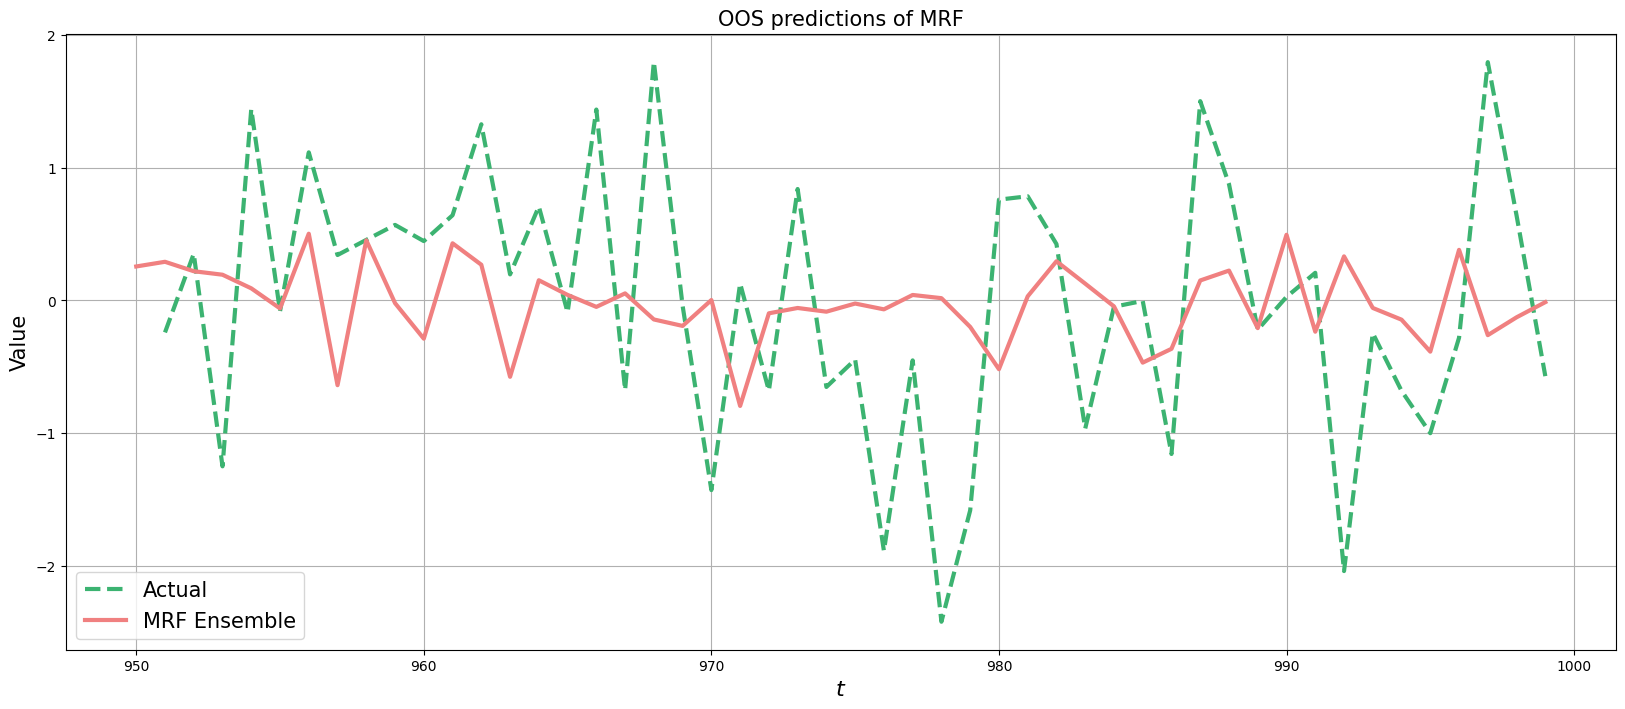

In [14]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)

# Plotting actual versus original
ax.plot(simulated_data['sim_y'].loc[oos_pos].shift(1), label = 'Actual', linewidth = 3, color ='mediumseagreen', linestyle = '--')
ax.plot(forecasts, color = 'lightcoral', linewidth = 3, label = "MRF Ensemble")

ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)

c:\dev\checkout\macroeconomic-random-forest\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1631: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


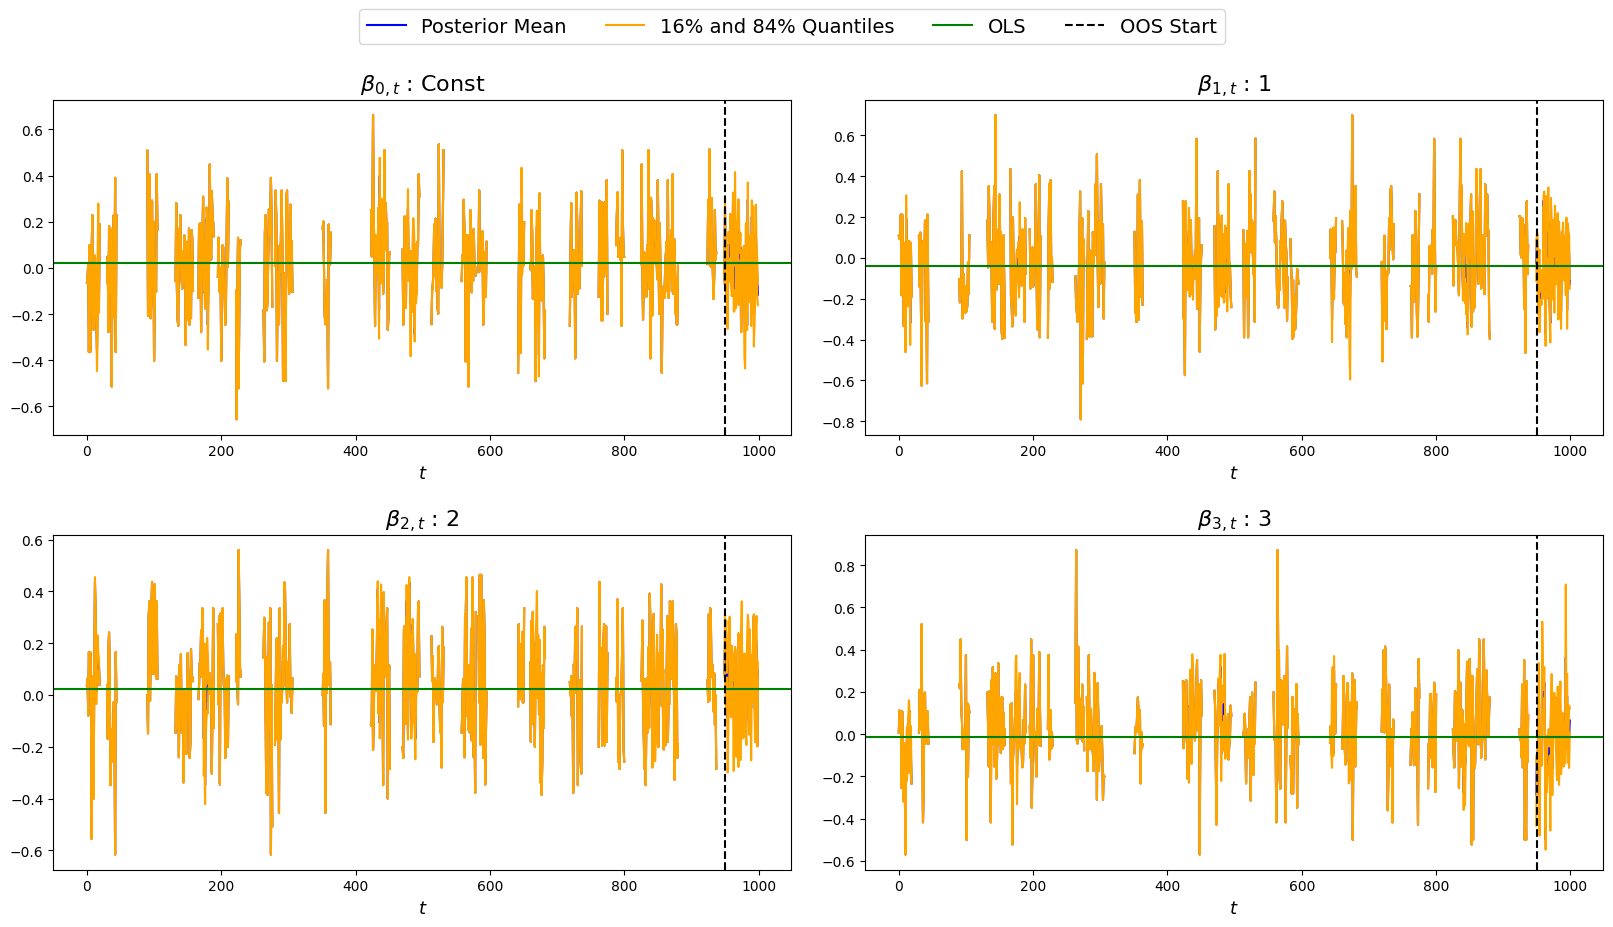

In [15]:
MRF.band_plots()